In [1]:
from cv_paper_plots import xfreq_analysis
import h5py, os, pickle
from importlib import reload
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from ecog.utils import bands

In [2]:
folder = os.path.join(os.environ['HOME'],'Development/data/ecog/AA_ff/')
subjects = ['ec2', 'ec9', 'gp31', 'gp33']
files = ['EC2_blocks_1_8_9_15_76_89_105_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'EC9_blocks_15_39_46_49_53_60_63_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'GP31_blocks_1_2_4_6_9_21_63_65_67_69_71_78_82_83_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'GP33_blocks_1_5_30_CV_AA_ff_align_window_-0.5_to_0.79_file.h5']

# Create data

In [3]:
reload(xfreq_analysis)
subject = 'ec2'
cv = 'gaa'
channels = [103, 106]
with h5py.File(os.path.join(folder, files[0])) as f:
    for ch in channels:
        xfreq_analysis.save_power(f, ch, cv, subject)

In [4]:
reload(xfreq_analysis)
for subject, f_name in zip(subjects, files):
    print(subject)
    with h5py.File(os.path.join(folder, f_name)) as f:
        xfreq_analysis.save_correlations(f, subject)

ec2
ec9
gp31
gp33


In [5]:
reload(xfreq_analysis)
for subject, f_name in zip(subjects, files):
    print(subject)
    with h5py.File(os.path.join(folder, f_name)) as f:
        xfreq_analysis.save_hg_power(f, subject)

ec2
ec9
gp31
gp33


# Plot 1

In [425]:
plt.close()
f = plt.figure(figsize=(6, 7))

l_edge = .115
t_edge = .05
r_edge = .05
b_edge = .075

v_gap = .15

h1_gap = .075
h2_gap = .075

r1_height = .4
r3_height = .2
r2_height = 1. - t_edge - r1_height - h1_gap - h2_gap - r3_height - b_edge

width = (1. - l_edge - r_edge - v_gap) / 2.

c1_x = l_edge + width + v_gap

r1_y = h1_gap + r2_height + h2_gap + r3_height + b_edge
ax0 = f.add_axes([l_edge, r1_y, width, r1_height])
ax1 = f.add_axes([c1_x, r1_y, width, r1_height])

r2_y = h2_gap + r3_height + b_edge
ax2 = f.add_axes([l_edge, r2_y, width, r2_height])
ax3 = f.add_axes([c1_x, r2_y, width, r2_height])

r3_y = b_edge
ax4 = f.add_axes([l_edge, r3_y, width, r3_height])
ax5 = f.add_axes([c1_x, r3_y, width, r3_height])

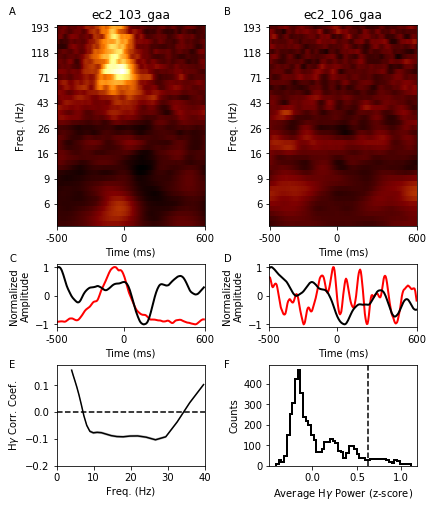

In [426]:
reload(xfreq_analysis)
subject = 'ec2'
cv = 'gaa'
ch = 103
xfreq_analysis.plot_power(subject, ch, cv, [ax0, ax2], vmin=-0.725590412048, vmax=2.90856576009)

ch = 106
xfreq_analysis.plot_power(subject, ch, cv, [ax1, ax3], vmin=-0.725590412048, vmax=2.90856576009)

xfreq_analysis.plot_correlations(subject, ax4, kind='freq')

xfreq_analysis.plot_power_histogram(subject, ax5)

x0 = .005
y0 = .97
x1 = .502
y1 = .48
y2 = .27

f.text(x0, y0, 'A')
f.text(x1, y0, 'B')
f.text(x0, y1, 'C')
f.text(x1, y1, 'D')
f.text(x0, y2, 'E')
f.text(x1, y2, 'F')

plt.savefig('/home/jesse/Downloads/xfreq1.pdf')

plt.show()

# Plot 2

In [423]:
plt.close()
figsize=(6, 5)
f = plt.figure(figsize=figsize)
x_over_y = figsize[0] / figsize[1]

l_edge = .125
t_edge = .01
r_edge = .015
b_edge = .1

v_gap = .15

h_gap = .15

width = (1. - l_edge - r_edge - h_gap) / 2.

r1_height = width * x_over_y
r2_height = 1. - t_edge - r1_height - v_gap - b_edge

c1_x = l_edge + width + h_gap

r1_y = v_gap + r2_height + b_edge
ax0 = f.add_axes([l_edge, r1_y, width, r1_height])
ax1 = f.add_axes([c1_x, r1_y, width, r1_height])

r2_y = b_edge
ax2 = f.add_axes([l_edge, r2_y, width, r2_height])
ax3 = f.add_axes([c1_x, r2_y, width, r2_height])

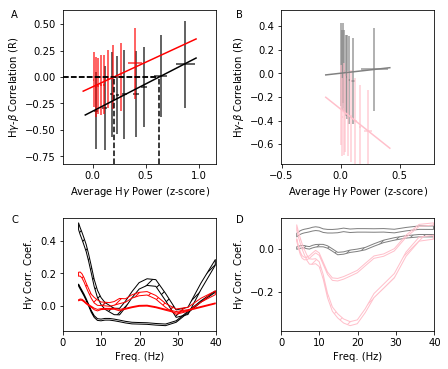

In [424]:
reload(xfreq_analysis)
pcts = xfreq_analysis.plot_power_correlations(['ec2', 'gp33'], ax0, num=0, cs=['k', 'red'])

xfreq_analysis.plot_power_correlations(['ec9', 'gp31'], ax1, num=0, cs=['gray', 'pink'], cutoff_pct=np.mean(pcts))
                                       
xfreq_analysis.plot_resolved_power_correlations(['ec2', 'gp33'], ax2, cs=['k', 'red'])
xfreq_analysis.plot_resolved_power_correlations(['ec9', 'gp31'], ax3, cs=['gray', 'pink'])

x0 = .005
y0 = .97
x1 = .525
y1 = .4

f.text(x0, y0, 'A')
f.text(x1, y0, 'B')
f.text(x0, y1, 'C')
f.text(x1, y1, 'D')

plt.savefig('/home/jesse/Downloads/xfreq2.pdf')

plt.show()

# Plot 3

In [2]:
with open(os.path.join(os.environ['HOME'], 'plots/xfreq/data/multiband_results.pkl'), 'rb') as f:
    data = pickle.load(f, encoding='latin1')
single, multi, single_a, multi_a = data

In [16]:
bands = ['theta', 'alpha', 'low\nbeta', 'high\nbeta', 'gamma']
band_abbreviations = ['t', 'a', 'b', 'hb', 'g']
d = np.load(os.path.join(os.environ['HOME'], 'plots/ds/data/dataset_chance.npz'))
chance = d['chance_data'][0, :, -1].mean(axis=-1)
training_size = d['training_size']
colors = ['black', 'gray', 'pink', 'red']
subjects = ['ec2', 'ec9', 'gp31', 'gp33']

In [17]:
chance.shape

(4, 10)

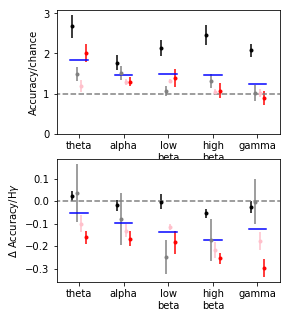

In [18]:
plt.close()
f, (ax0, ax1) = plt.subplots(2, figsize=(4, 5))
for ii, ba in enumerate(band_abbreviations):
    for jj, (col, ch) in enumerate(zip(colors, chance)):
        x = ii + .1 *(jj-1.5)
        y = single_a[ba][jj, 2] / ch
        ym = y.mean()
        ysem = y.std() / np.sqrt(10)
        ax0.errorbar(x, ym, yerr=ysem, fmt='.', c=col)
        y = (multi_a[ba][jj, 2]-single_a['hg'][jj, 2])/single_a['hg'][jj, 2]
        ym = y.mean()
        ysem = y.std() / np.sqrt(10)
        ax1.errorbar(x, ym, yerr=ysem, fmt='.', c=col)
    ax0.plot([ii - .2, ii + .2], 2 * [np.mean(single_a[ba][:, 2]/chance)], 'b')
    ax1.plot([ii - .2, ii + .2],
             2 * [np.mean((multi_a[ba][:, 2]-single_a['hg'][:, 2])/single_a['hg'][:, 2])], 'b')
for ax in [ax0, ax1]:
    ax.set_xticks(np.arange(len(band_abbreviations)))
    ax.set_xticklabels(bands)
    ax.set_xlim(-.5, 4.5)
ax0.set_ylim(0, None)
ax0.set_ylabel('Accuracy/chance')
ax1.set_ylabel(r'$\Delta$ Accuracy/H$\gamma$')
ax0.plot([-10, 10], [1, 1], '--', c='gray')
ax1.plot([-10, 10], [0, 0], '--', c='gray')
plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/multiband.pdf'))
plt.show()